### Упражнение 1.1

Я ознакомился с приведенными примерами.

### Упражнение 1.2

Скачайте с сайта https://freesound.org/ образец звука, включающий музыку, речь или иные звуки, имеющие четко выраженную высоту. Выделите примерно полусекундный сегмент, в котором высота постоянна. Вычислите и распечатайте спектр выбранного сегмента. Как связанны тембр звука и гармоническая структура, видимая в спепктре?

Используйте high_pass, low_pass и band_stop для фильтрации тех или иных гармоник. Затем преобразуйте спектры обратно в сигнал и прослушайте его. Как звук соотносится с изменениями, сделанными в спектре?

In [21]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/Yuichir0/Telecom/thinkdsp.py
if not os.path.exists('334538__teddy_frost__c4.wav'):
    !wget https://github.com/Yuichir0/Telecom/334538__teddy_frost__c4.wav
from thinkdsp import read_wave

wave = read_wave('334538__teddy_frost__c4.wav')
wave.normalize()
wave.make_audio()

Построю waveform звука

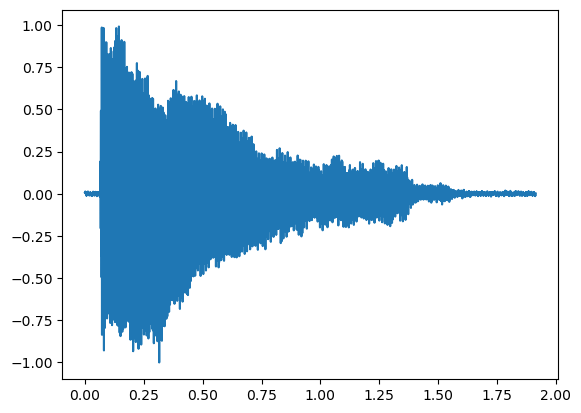

In [2]:
wave.plot()

Так как выбранный звук это нота С4 на пианино, то частота на всем промежутке одинакова - выберу произвольный сегмент

In [3]:
segment = wave.segment(start=0, duration=0.6)
segment.make_audio()

Так выглядит сегмент

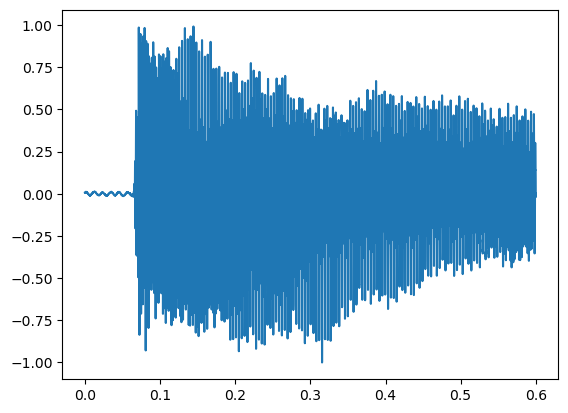

In [4]:
segment.plot()

Уменьшу отображаемый сегмент для наглядности waveform-ы

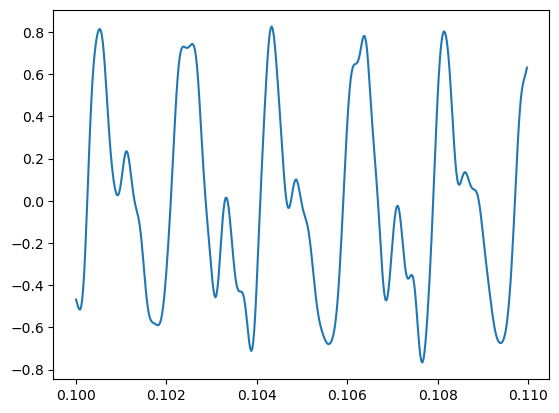

In [5]:
segment.segment(start=0.1, duration=0.01).plot()

Разложу сегмент на спектр

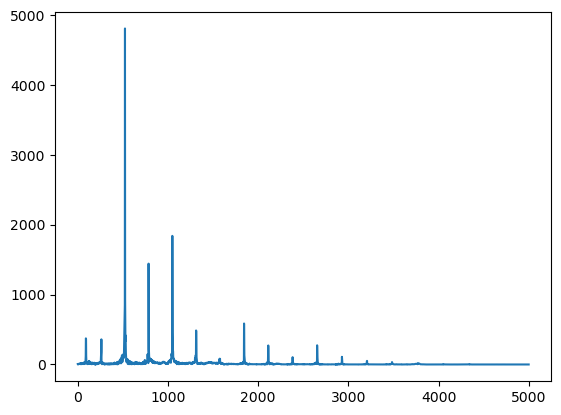

In [6]:
spectrum = segment.make_spectrum()
spectrum.plot(high=5000)

Уменьшу отображаемый диапазон

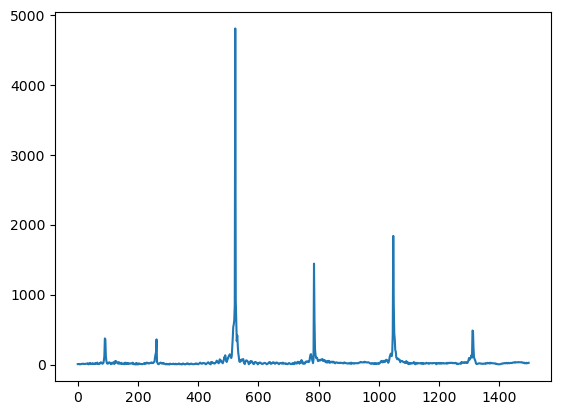

In [7]:
spectrum = segment.make_spectrum()
spectrum.plot(high=1500)

Воспользуюсь функцией peaks для нахождения точного значения пиковых частоты

In [8]:
spectrum.peaks()[:25]

[(4813.318669272516, 523.3333333333334),
 (1842.1136599461845, 1048.3333333333335),
 (1444.4365025771583, 785.0),
 (917.9098374987158, 525.0),
 (874.1550213425105, 1050.0),
 (848.6320308550622, 521.6666666666667),
 (632.0054797841241, 520.0),
 (620.6852228453434, 786.6666666666667),
 (617.1758666705813, 526.6666666666667),
 (586.9418565067414, 1843.3333333333335),
 (573.0495716533328, 518.3333333333334),
 (538.0031612444975, 516.6666666666667),
 (486.841297073411, 1311.6666666666667),
 (477.1184416209847, 1313.3333333333335),
 (449.20525035072865, 1051.6666666666667),
 (440.76886325286296, 1046.6666666666667),
 (416.4754796661991, 530.0),
 (378.8480074032702, 515.0),
 (373.8018654267291, 90.0),
 (361.5846450531277, 91.66666666666667),
 (361.17888119958576, 1053.3333333333335),
 (359.70139573361763, 261.6666666666667),
 (345.37273802885136, 1845.0),
 (334.95505487069147, 528.3333333333334),
 (274.617427082086, 2653.3333333333335)]

Пиковая частота - 523.33 Гц, что равняется ноте С5, следующая по громкости частота - 1048 - это следующая октава, С6, которая также является гармонией для ноты С5.
Теперь уберу высокие частоты и сравню с оригинальным звуком

In [9]:
spectrum.low_pass(2000)
low_filtered = spectrum.make_wave()
segment.make_audio()

In [10]:
low_filtered.make_audio()

Звук без высоких частот звучит более низким, чем оригинальный.
Теперь воспользуюсь остальными методами для фильтрации частот - high_pass и band_stop

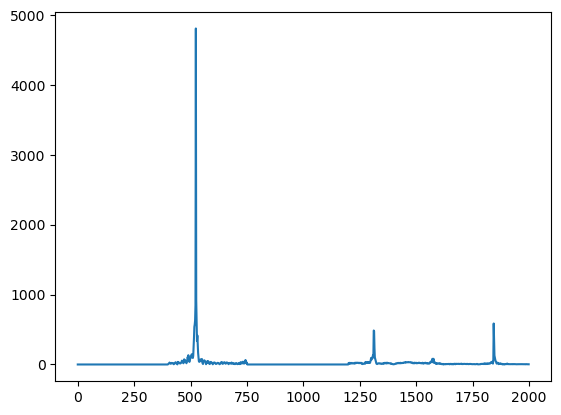

In [11]:
mid_high_filtered = spectrum
mid_high_filtered.high_pass(400)
mid_high_filtered.band_stop(750, 1200)
mid_high_filtered.plot(2000)
mid_high_filtered.make_wave().make_audio()

Без ближайших гармоний звук стал более электронным и звонким

### Упражнение 1.3

Создайте сложный сигнал из объектов SinSignal и CosSignal, суммируя их. Обработайте сигнал для получения wave и прослушайте его. Вычислите Spectrum и распечатайте. Что произойдет при добавлении частот, не кратных основным?

###Решение
Попробую собрать D minor из синусов и косинусов

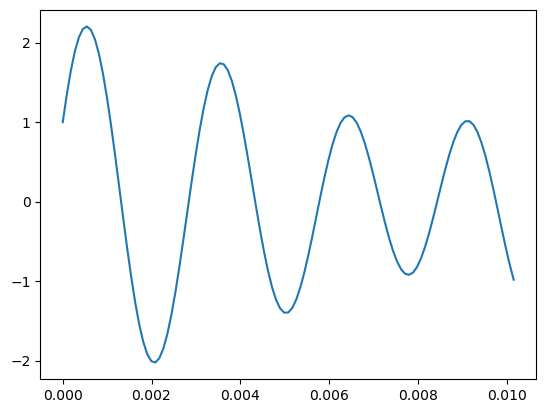

In [12]:
from thinkdsp import SinSignal, CosSignal

signal = (SinSignal(freq=293.66, amp=1) +
          CosSignal(freq=329.63, amp=1) +
          SinSignal(freq=349.23, amp=1))
signal.plot()

Послушаем, что получилось

In [13]:
dMinor = signal.make_wave(duration=1)
dMinor.apodize()
dMinor.make_audio()

Разложим волну на спектр и добавим не гармоничную частоту

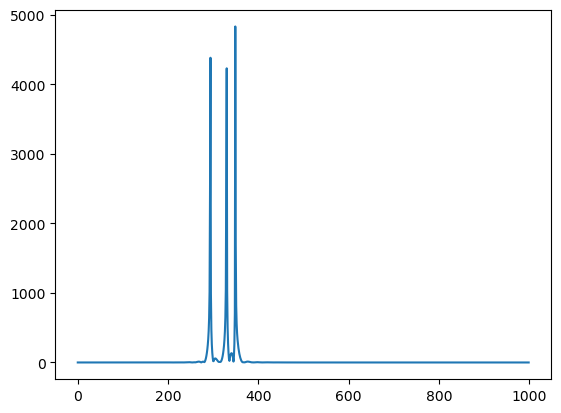

In [14]:
spectrum = dMinor.make_spectrum()
spectrum.plot(high=1000)

In [15]:
signal += SinSignal(freq=600, amp = 1)
signal.make_wave().make_audio()

Можно четко услышать случайно добавленную частоту, так как она не гармонична с остальными

### Упражнение 1.4

Напишите функцию stretch, берущую wave и коэффициент изменения. Она должна ускорять или замедлять сигнал изменением ts и framerate. Подсказка: должно получиться всего 2 строки кода.

### Решение

Ниже описана получившаяся функция

In [16]:
def stretch(wave, rate):
    wave.ts *= rate
    wave.framerate /= rate

Воспользуюсь ей на исходном примере, ускорив его в 2 раза

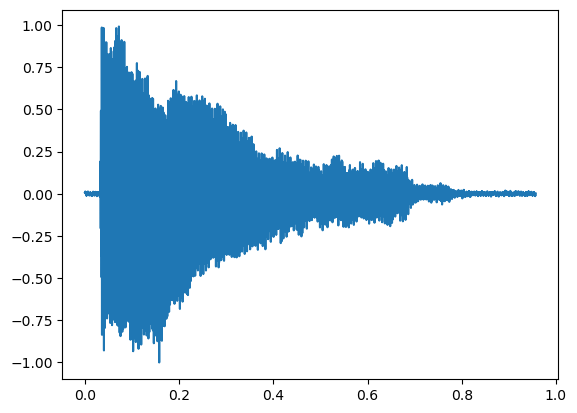

In [17]:
wave = read_wave('334538__teddy_frost__c4.wav')
wave.normalize()
wave.make_audio()
stretch(wave, 0.5)
wave.plot()

In [18]:
wave.make_audio()

Теперь замедлю его в 4 раза

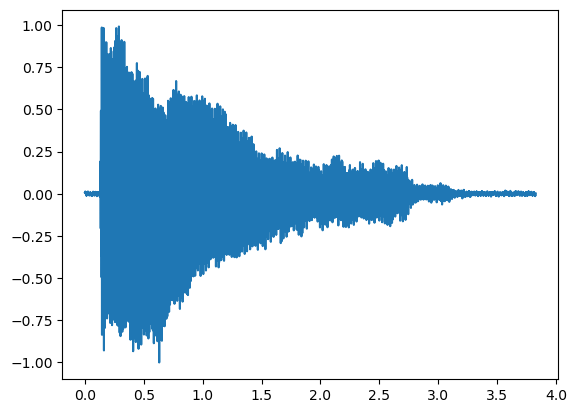

In [19]:
stretch(wave, 4)
wave.plot()

In [20]:
wave.make_audio()